In [1]:
# Parameters
base_result_filename = {
    "correlation": "conditional_correlations/analyzed_corr_coef_results_gp.npz",
    "fitness": "fitness_coefs/analyzed_fitness_coef_results_gp.npz",
}
results_dir = "../.."
kde_bounds = [0, 1]
right_y_title = ""
transformation_name = "identity"
start_indices = [0]
metric_name = "neg_fdr_tp"
y_title = "Fraction of Random Guesses with Strictly Worse Negative FDR"


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from plot_utils import bipointVariantsPlotter as Plotter

In [4]:
transformations = {'identity': (lambda x: x), 'butterfly': (lambda x: -np.log(1. - x)/np.log(10))}
transformation = transformations[transformation_name]

In [5]:
plotter = Plotter(base_result_filename, results_dir, kde_bounds)

In [6]:
performance = plotter.load_performance_results(metric_name)
performance = transformation(performance)

## Unnormalized vs. Normalized Averages side-by-side

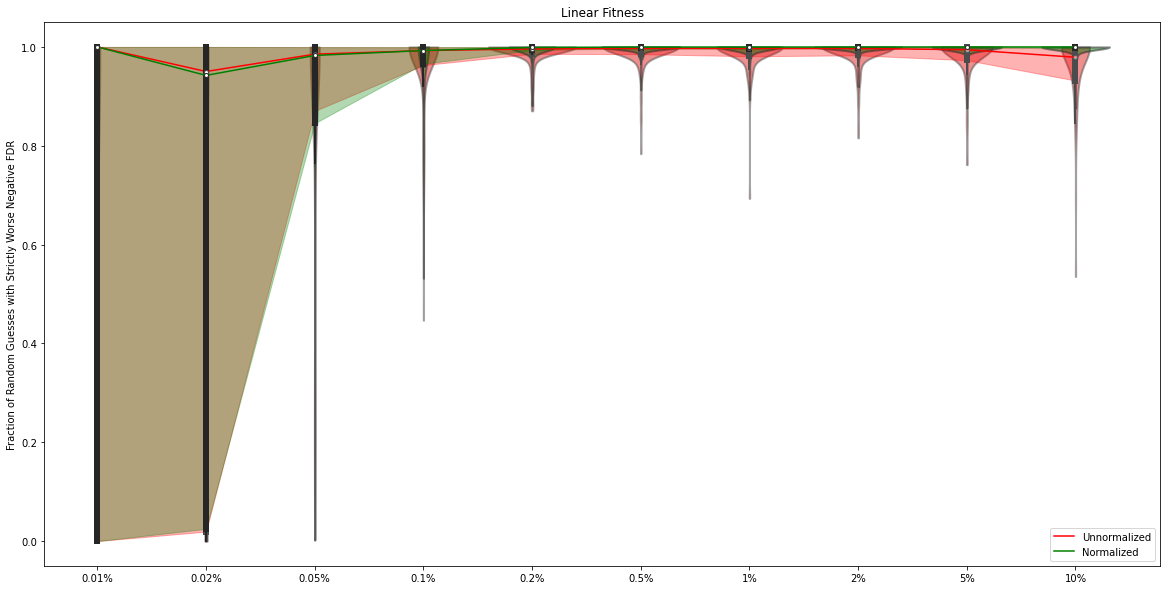

In [7]:
for start_index in start_indices:
    ax = plotter.avg_types_side_by_side(performance, "fitness", "linear", y_title=y_title, start_index=start_index)
    if transformation_name == 'butterfly':
        plotter.annotate_important_log_scores(ax, right_y_title)

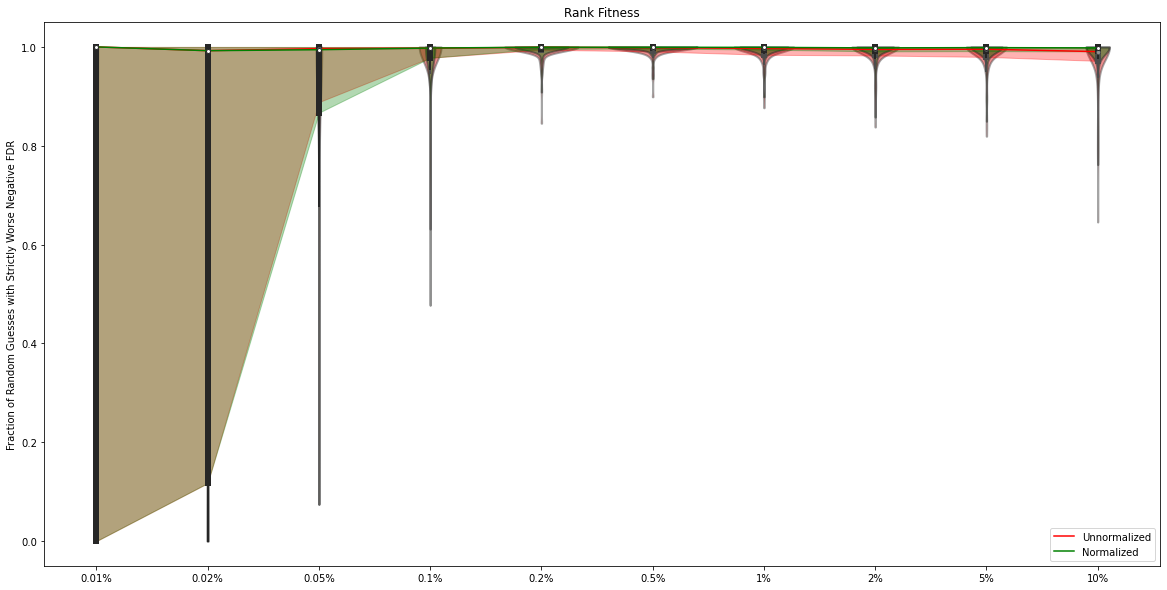

In [8]:
for start_index in start_indices:
    ax = plotter.avg_types_side_by_side(performance, "fitness", "rank", y_title=y_title, start_index=start_index)
    if transformation_name == 'butterfly':
        plotter.annotate_important_log_scores(ax, right_y_title)

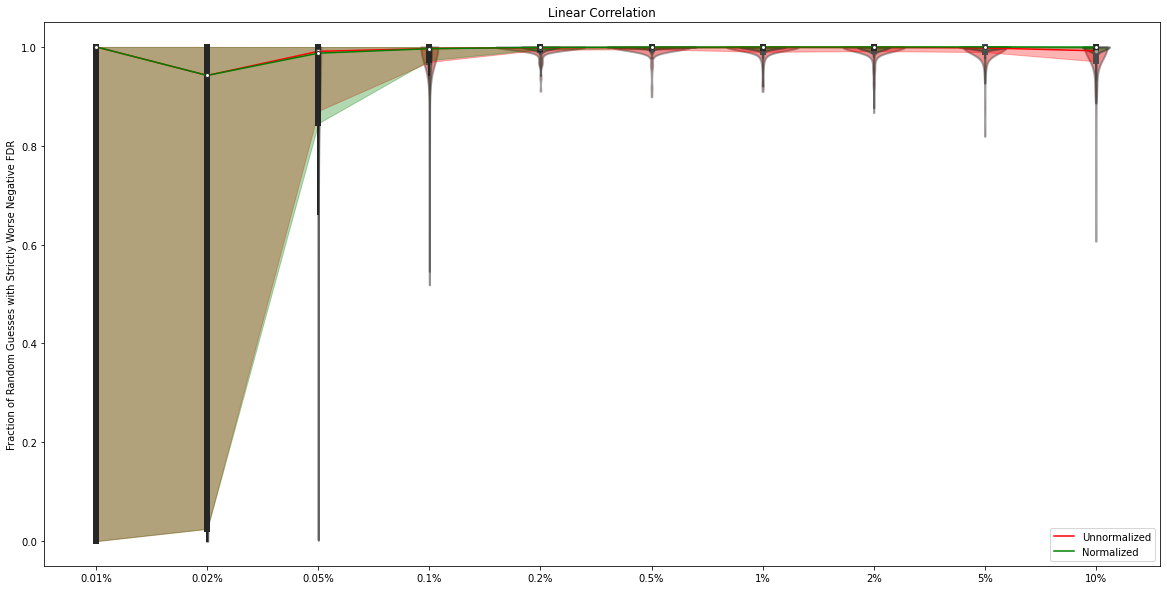

In [9]:
for start_index in start_indices:
    ax = plotter.avg_types_side_by_side(performance, "correlation", "linear", y_title=y_title, start_index=start_index)
    if transformation_name == 'butterfly':
        plotter.annotate_important_log_scores(ax, right_y_title)

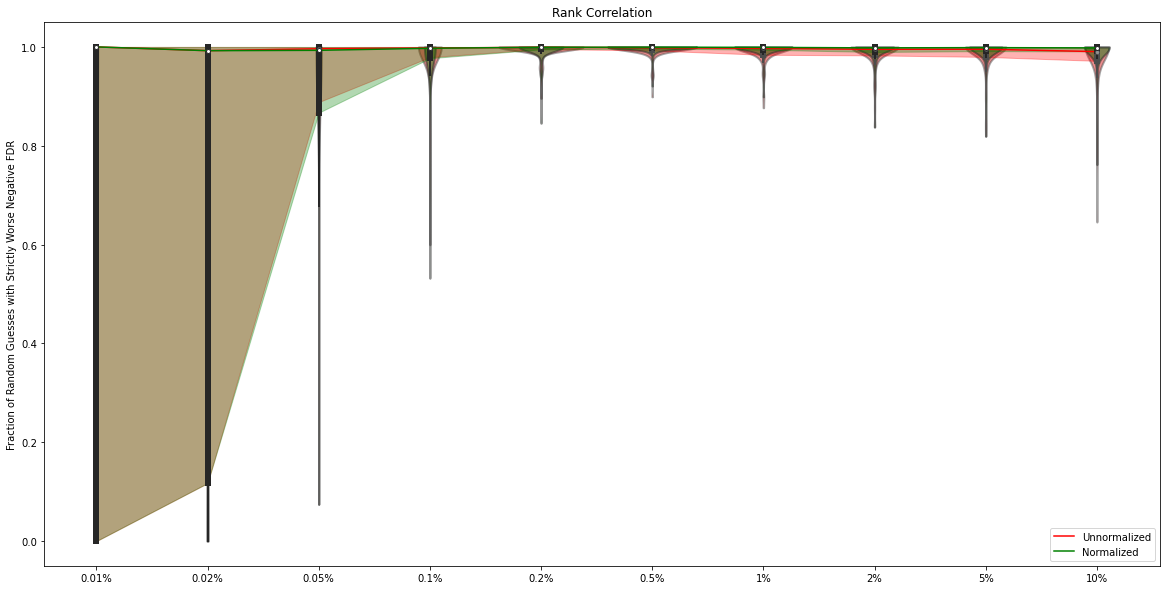

In [10]:
for start_index in start_indices:
    ax = plotter.avg_types_side_by_side(performance, "correlation", "rank", y_title=y_title, start_index=start_index)
    if transformation_name == 'butterfly':
        plotter.annotate_important_log_scores(ax, right_y_title)